In [8]:
from math import *

R = 6374000
h_r = 0
h_t = 11000

d = (acos(R/(R+h_r)) +acos(R/(R+h_t))) * R

def get_d_NM(h_t):
    return ((acos(R/(R+h_r)) +acos(R/(R+h_t))) * R)/1852

def get_d_km(h_t):
    return ((acos(R/(R+h_r)) +acos(R/(R+h_t))) * R)/1000

def get_ht_km(d):
    term1 = cos( (d - (acos(R/(R+h_r))))/R )
    ht = R/term1 - R
    
    return ht

In [9]:
d = get_d_km(20)

print(get_ht_km(d * 1000))

20.0


0


(-10.546771271935334, 221.48219671064203, -19.669595, 413.06149500000004)

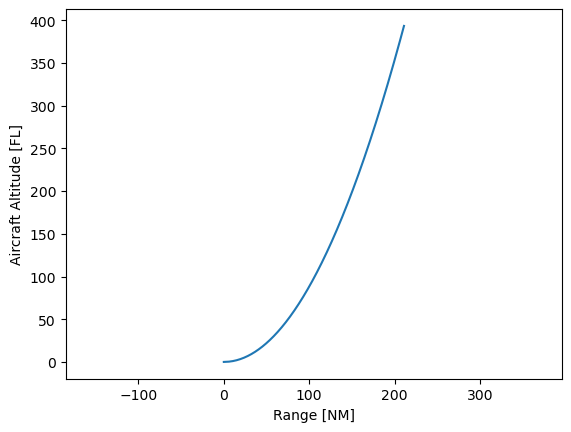

In [10]:
import matplotlib.pyplot as plt
import numpy as np

aircraft_alt_list = list(range(0, 12000, 10))

d_list = []

print(h_r)

for alt in aircraft_alt_list:
    d = (acos(R/(R+h_r)) +acos(R/(R+alt))) * R
    d_list.append(d)
    
d_list = np.array(d_list)
aircraft_alt_list = np.array(aircraft_alt_list)

d_list = d_list / 1852
aircraft_alt_list = aircraft_alt_list*3.281/100

plt.plot(d_list, aircraft_alt_list)

# plt.axis('equal')
# plt.xlim(-15, 250)
# plt.ylim(-15, 415)

plt.xlabel('Range [NM]')
plt.ylabel('Aircraft Altitude [FL]')

plt.axis('equal')
# for i in range(0, 1200, 200):
#     plt.axhline(y = aircraft_alt_list[i], color = 'tab:blue', label = 'axvline - full height')

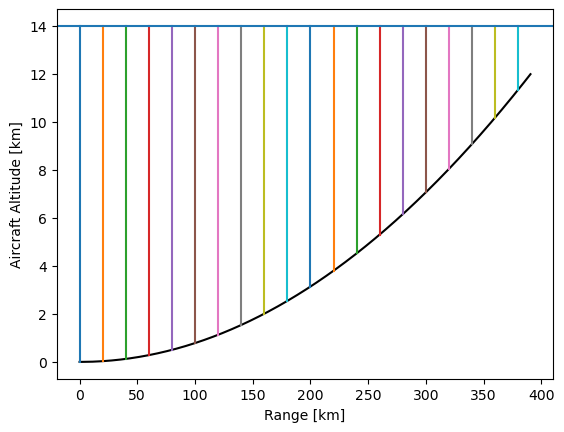

In [11]:
import matplotlib.pyplot as plt
import numpy as np

aircraft_alt_list = list(range(0, 12000, 10))

d_list = []

for alt in aircraft_alt_list:
    d = (acos(R/(R+h_r)) +acos(R/(R+alt))) * R
    d_list.append(d)
    
d_list = np.array(d_list)
aircraft_alt_list = np.array(aircraft_alt_list)

d_list = d_list / 1000
aircraft_alt_list = aircraft_alt_list / 1000

plt.plot(d_list, aircraft_alt_list, color = 'black')

# plt.axis('equal')
# plt.xlim(-15, 250)
# plt.ylim(-15, 415)

plt.xlabel('Range [km]')
plt.ylabel('Aircraft Altitude [km]')

# plt.axis('equal')

for i in range(0, 400, 20):
    d1 = i
    d2 = i+20
    
    alt = get_ht_km(d1*1000) / 1000
    
    plt.plot([d1, d1], [14, alt])
    
plt.axhline(y = 14)

1.5707963267948966

In [143]:
len(d_list)

1200

In [222]:
area_list = []
volume_list = []

alt_avg_before = 14

## suppose the maximum altitude is 14 km
for i in range(0, 400, 20):
    d1 = i
    d2 = i+20
    
    alt_avg = 14 - get_ht_km(d1*1000) / 1000
    
    area = 1/2 * (alt_avg + alt_avg_before) * (d2 - d1)
    volume = area * 2*pi
    
    alt_avg_before = alt_avg
    
    area_list.append(area)
    volume_list.append(volume)

10.18

Text(0, 0.5, 'Vertical Area [$km^2$]')

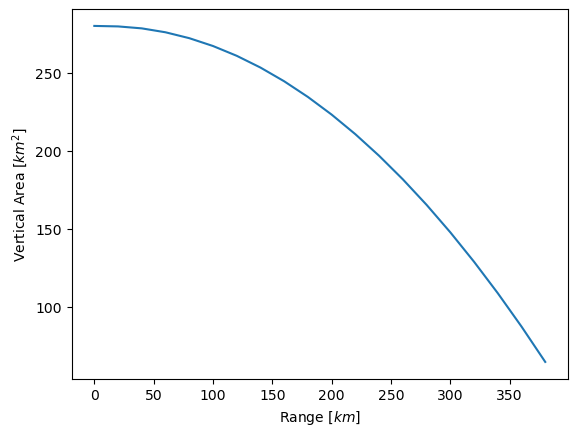

In [223]:
plt.plot(list(range(0, 400, 20)), area_list)
    
plt.xlabel('Range [$km$]')
plt.ylabel('Vertical Area [$km^2$]')

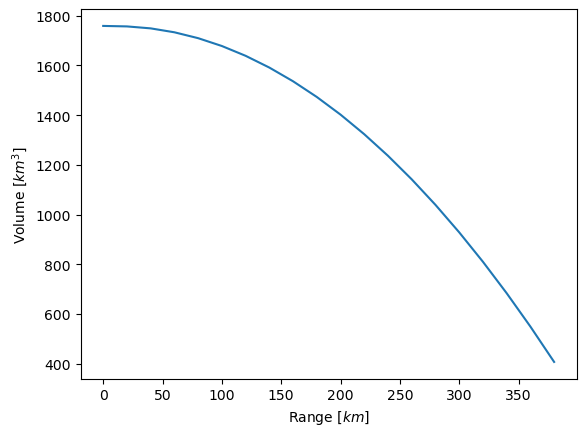

In [224]:
plt.plot(list(range(0, 400, 20)), volume_list)

plt.xlabel('Range [$km$]')
plt.ylabel('Volume [$km^3$]')


for i in range(0, 350, 20):
    d1 = i
    d2 = i+20
    
#     plt.axvline(d1)

In [225]:
volume_total = []

volume_cumul = 0

for i in range(len(volume_list)):
    vol = volume_list[i]
    volume_cumul += vol
    
    volume_total.append(volume_cumul)

Text(0, 0.5, 'Minimum Altitude [$km$]')

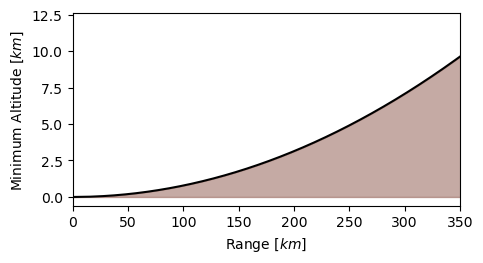

In [265]:
plt.figure(figsize=(5, 2.5))

plt.plot(d_list, aircraft_alt_list, color = 'black')
plt.fill_between(d_list, aircraft_alt_list, min(aircraft_alt_list), color='tab:brown', alpha=0.5)

ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.xlim(0, 350)

plt.xlabel('Range [$km$]')

plt.xlabel('Range [$km$]')
plt.ylabel('Minimum Altitude [$km$]')

Text(0, 0.5, 'Volume Coverage [$10^3 km^3$]')

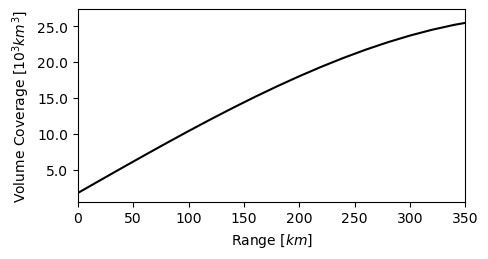

In [263]:
plt.figure(figsize=(5, 2.5))

plt.plot(list(range(0, 400, 20)), np.array(volume_total)/1000, color = 'black')

ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.xlim(0, 350)

plt.xlabel('Range [$km$]')

plt.xlabel('Range [$km$]')
plt.ylabel('Volume Coverage [$10^3 km^3$]')

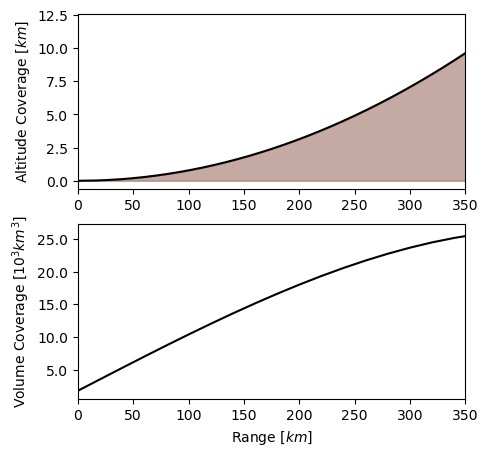

In [248]:
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(nrows=2, figsize=(5, 5))

axes[0].plot(d_list, aircraft_alt_list, color = 'black')
axes[0].fill_between(d_list, aircraft_alt_list, min(aircraft_alt_list), color='tab:brown', alpha=0.5)

axes[1].plot(list(range(0, 400, 20)), np.array(volume_total)/1000, color = 'black')

axes[0].set_xlim(0, 350)
axes[1].set_xlim(0, 350)

plt.xlabel('Range [$km$]')
axes[0].set_ylabel('Altitude Coverage [$km$]')
axes[1].set_ylabel('Volume Coverage [$10^3 km^3$]')

axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

In [87]:
max(d_list)

390.65240791248476

In [88]:
max(aircraft_alt_list)

11.99